<h2><a href="https://leetcode.com/problems/design-add-and-search-words-data-structure/">211. Design Add and Search Words Data Structure</a></h2><h3>Medium</h3><hr><p>Design a data structure that supports adding new words and finding if a string matches any previously added string.</p>

<p>Implement the <code>WordDictionary</code> class:</p>

<ul>
	<li><code>WordDictionary()</code>&nbsp;Initializes the object.</li>
	<li><code>void addWord(word)</code> Adds <code>word</code> to the data structure, it can be matched later.</li>
	<li><code>bool search(word)</code>&nbsp;Returns <code>true</code> if there is any string in the data structure that matches <code>word</code>&nbsp;or <code>false</code> otherwise. <code>word</code> may contain dots <code>&#39;.&#39;</code> where dots can be matched with any letter.</li>
</ul>

<p>&nbsp;</p>
<p><strong class="example">Example:</strong></p>

<pre>
<strong>Input</strong>
[&quot;WordDictionary&quot;,&quot;addWord&quot;,&quot;addWord&quot;,&quot;addWord&quot;,&quot;search&quot;,&quot;search&quot;,&quot;search&quot;,&quot;search&quot;]
[[],[&quot;bad&quot;],[&quot;dad&quot;],[&quot;mad&quot;],[&quot;pad&quot;],[&quot;bad&quot;],[&quot;.ad&quot;],[&quot;b..&quot;]]
<strong>Output</strong>
[null,null,null,null,false,true,true,true]

<strong>Explanation</strong>
WordDictionary wordDictionary = new WordDictionary();
wordDictionary.addWord(&quot;bad&quot;);
wordDictionary.addWord(&quot;dad&quot;);
wordDictionary.addWord(&quot;mad&quot;);
wordDictionary.search(&quot;pad&quot;); // return False
wordDictionary.search(&quot;bad&quot;); // return True
wordDictionary.search(&quot;.ad&quot;); // return True
wordDictionary.search(&quot;b..&quot;); // return True
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= word.length &lt;= 25</code></li>
	<li><code>word</code> in <code>addWord</code> consists of lowercase English letters.</li>
	<li><code>word</code> in <code>search</code> consist of <code>&#39;.&#39;</code> or lowercase English letters.</li>
	<li>There will be at most <code>2</code> dots in <code>word</code> for <code>search</code> queries.</li>
	<li>At most <code>10<sup>4</sup></code> calls will be made to <code>addWord</code> and <code>search</code>.</li>
</ul>


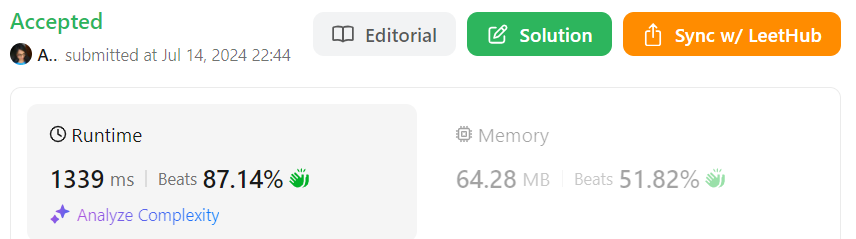

In [1]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.eow = False

class WordDictionary:
    def __init__(self):
        self.root = TrieNode()

    def addWord(self, word: str) -> None:
        cur = self.root
        for char in word:
            if char not in cur.children:
                cur.children[char] = TrieNode()
            cur = cur.children[char]
        cur.eow = True        

    def search(self, word: str) -> bool:
        cur = self.root
        return self.dfs(word, 0 , cur)

    def dfs(self, word, index, node):
        if index == len(word):
            return node.eow

        if word[index] == '.':
            for child in node.children:
                if self.dfs(word, index + 1, node.children[child]):  # Tries each child of node until it reaches eow
                    return True
        else:
            if word[index] in node.children:
                return self.dfs(word, index + 1, node.children[word[index]])

        return False
# Your WordDictionary object will be instantiated and called as such:
# obj = WordDictionary()
# obj.addWord(word)
# param_2 = obj.search(word)